In [1]:
import numpy as np
import matplotlib.pyplot as plt

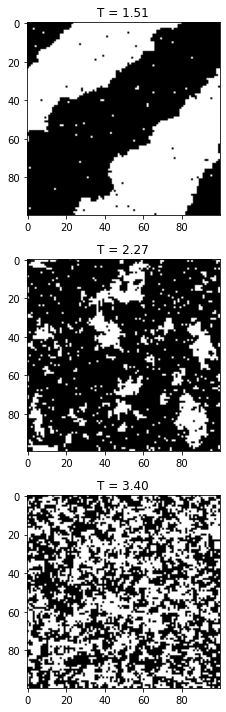

In [7]:
def ising_step(lattice, T):
    size = lattice.shape[0]
    for _ in range(size**2):
        # Select a random site on the lattice
        x, y = np.random.randint(0, size, 2)

        # Compute the energy change if this spin is flipped
        dE = 2 * lattice[x, y] * (lattice[(x+1)%size, y] + lattice[(x-1)%size, y] +
                                   lattice[x, (y+1)%size] + lattice[x, (y-1)%size])

        # Flip the spin if it lowers the energy, or with a probability of exp(-dE/T) otherwise
        if dE < 0 or np.random.rand() < np.exp(-dE / T):
            lattice[x, y] = -lattice[x, y]

# Create a new figure
fig, axes = plt.subplots(3, 1, figsize=(10,10))

# Define the size of the lattice
size = 100

# Initialize a lattice where most of the spins are pointing up
lattice = np.ones((size, size))

# Initialize some sections with the opposite spin
lattice[0:50, 0:50] = -1
lattice[50:100, 50:100] = -1

# Define the critical temperature and two other temperatures
Tc = 2 / np.log(1 + np.sqrt(2))  # Critical temperature
temperatures = [Tc / 1.5, Tc, Tc * 1.5]

for i, T in enumerate(temperatures):
    # Make a copy of the initial lattice
    lattice_copy = lattice.copy()
    # Perform a number of Ising steps at the given temperature
    for _ in range(1000):
        ising_step(lattice_copy, T)
    # Plot the final lattice
    axes[i].imshow(lattice_copy, cmap='binary')
    axes[i].set_title(f'T = {T:.2f}')

plt.tight_layout()
plt.show()
